#HICP Gross Inflation rate prediction and Livelihood analysis using Time Series ARIMA Modelling


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Release Date Inflation rate
0  Nov 13, 2023          4.87%
1  Oct 12, 2023          5.02%
2  Sep 12, 2023          6.83%
3  Aug 14, 2023          7.44%
4  Jul 12, 2023          4.81%


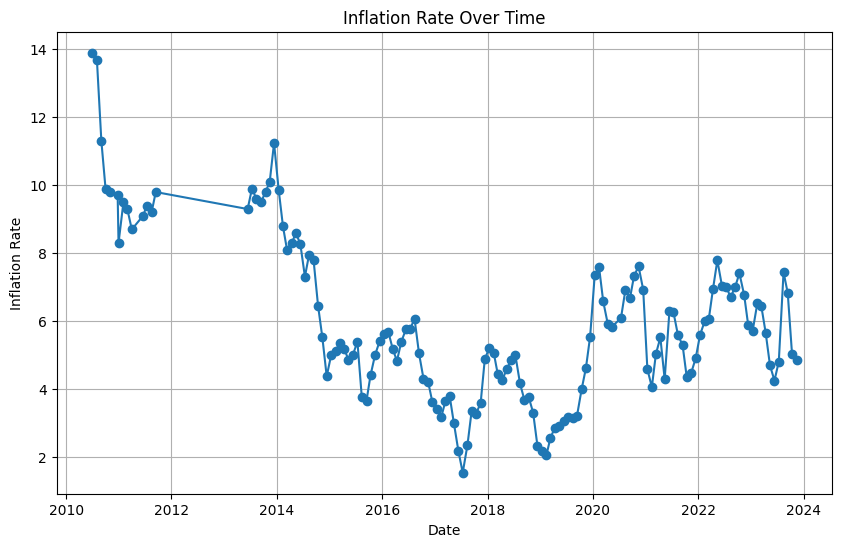

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# File path in your Google Drive
file_path = '/content/drive/My Drive/ariimadata.csv'

# Load data into a DataFrame
data = pd.read_csv(file_path)

# Assuming your DataFrame is named 'data'
# Drop columns with all NaN values
data = data.dropna(axis=1, how='all')

# Display the modified DataFrame
print(data.head())



# Convert 'Release Date' column to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'])

# Remove '%' sign and convert 'Inflation rate' to float
data['Inflation rate'] = data['Inflation rate'].replace({'%': ''}, regex=True).astype(float)

# Set 'Release Date' as the index
data.set_index('Release Date', inplace=True)

# Plotting the inflation rate over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Inflation rate'], marker='o', linestyle='-')
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()


EDA

In [ ]:
# Get statistical summary of the data
data.describe()


,Inflation rate
count,139.000000
mean,5.959568
std,2.370167
min,1.540000
25%,4.330000
50%,5.520000
75%,7.345000
max,13.900000


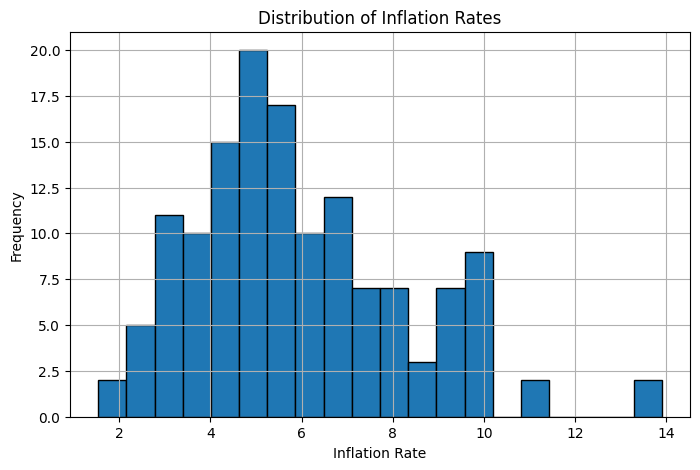

In [ ]:
# Histogram of inflation rates
plt.figure(figsize=(8, 5))
plt.hist(data['Inflation rate'], bins=20, edgecolor='black')
plt.title('Distribution of Inflation Rates')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


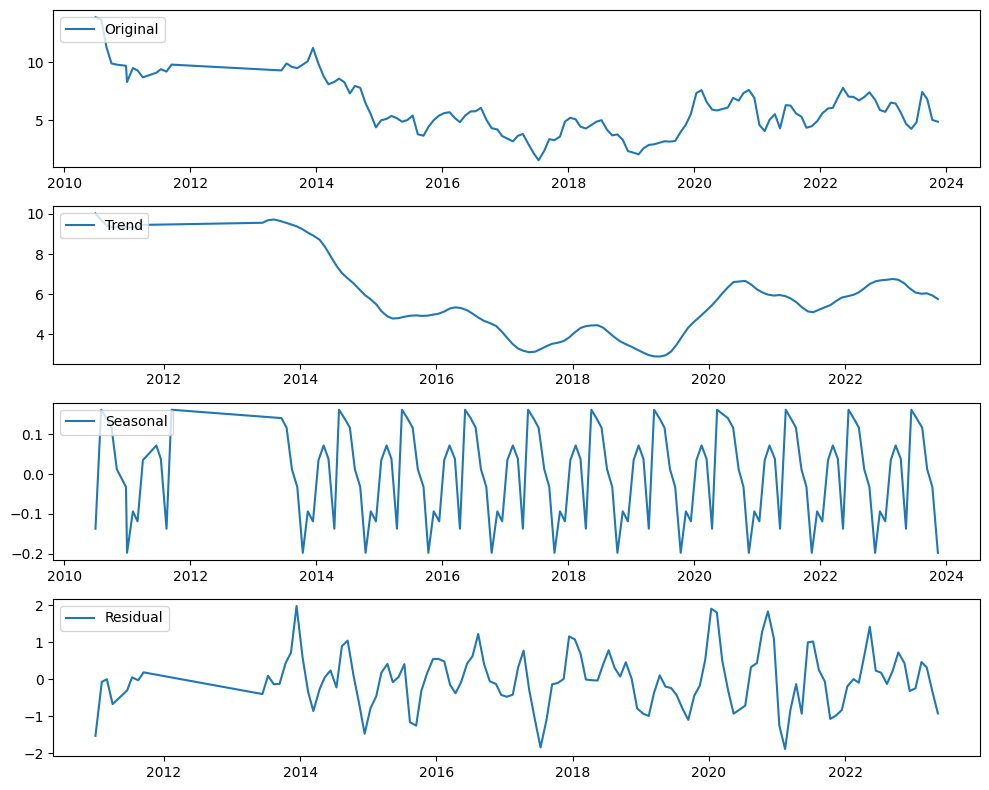

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition (trend, seasonal, residual)
decomposition = seasonal_decompose(data['Inflation rate'], period=12)  # Assuming 12 months in a year

# Plotting decomposition
plt.figure(figsize=(10, 8))

# Original series
plt.subplot(411)
plt.plot(data['Inflation rate'], label='Original')
plt.legend(loc='upper left')

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


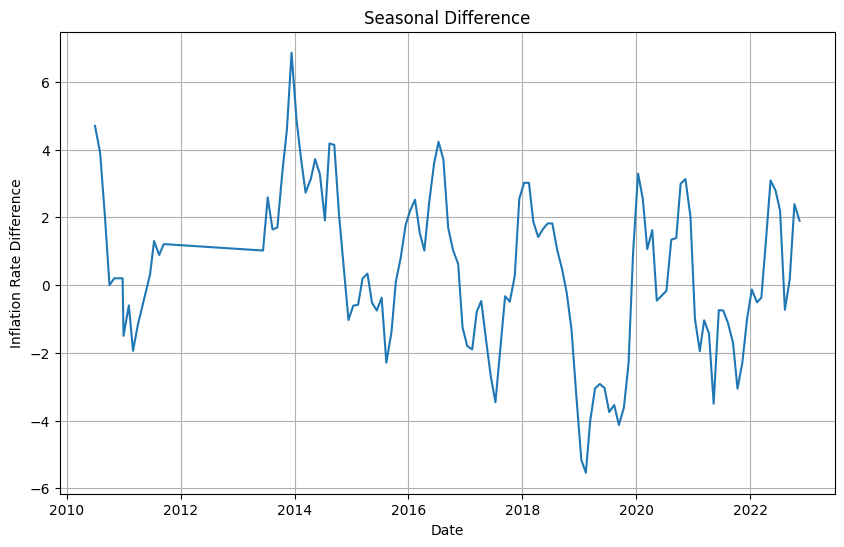

In [ ]:
# Seasonal difference (for example, monthly difference)
data['Seasonal Difference'] = data['Inflation rate'].diff(periods=12)  # Assuming a 12-month period

plt.figure(figsize=(10, 6))
plt.plot(data['Seasonal Difference'])
plt.title('Seasonal Difference')
plt.xlabel('Date')
plt.ylabel('Inflation Rate Difference')
plt.grid(True)
plt.show()


<Figure size 1000x400 with 0 Axes>

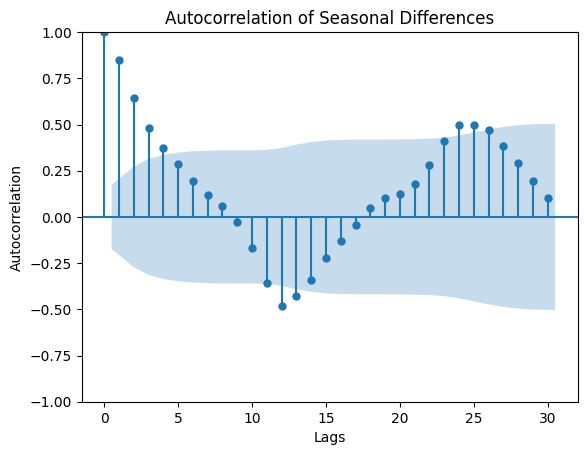

<Figure size 1000x400 with 0 Axes>

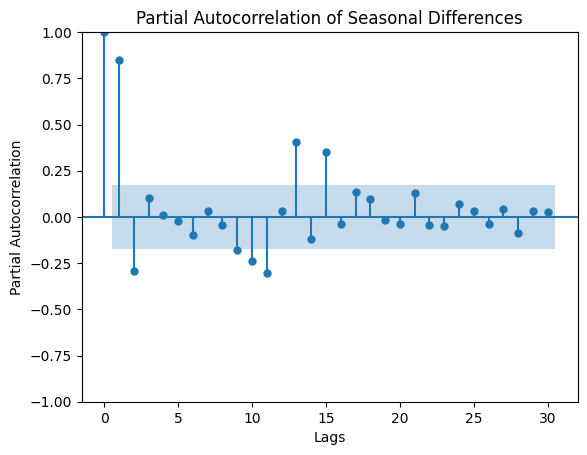

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot of differences
plt.figure(figsize=(10, 4))
plot_acf(data['Seasonal Difference'].dropna(), lags=30, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Seasonal Differences')
plt.show()

# Partial Autocorrelation plot of differences
plt.figure(figsize=(10, 4))
plot_pacf(data['Seasonal Difference'].dropna(), lags=30, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation of Seasonal Differences')
plt.show()


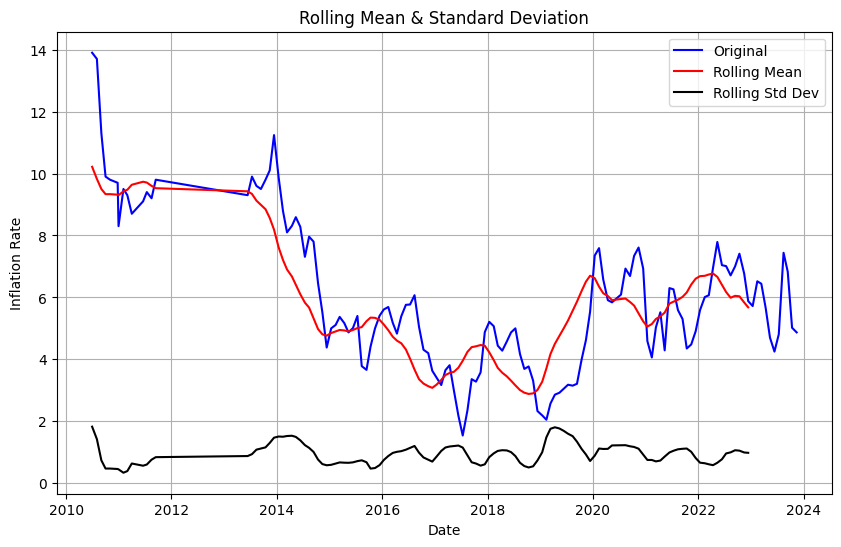

In [ ]:
# Calculate rolling mean and standard deviation
window = 12  # Assuming a yearly window
rolling_mean = data['Inflation rate'].rolling(window=window).mean()
rolling_std = data['Inflation rate'].rolling(window=window).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(data['Inflation rate'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()


Lag Plots

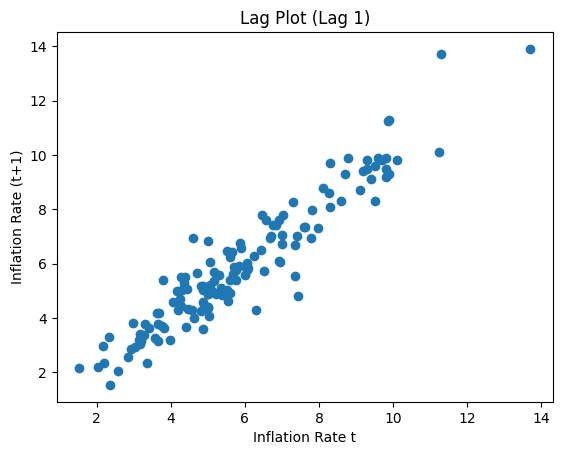

In [ ]:
from pandas.plotting import lag_plot

# Create a lag plot with lag 1 (to visualize relationship between observations at consecutive time steps)
lag_plot(data['Inflation rate'], lag=1)
plt.title('Lag Plot (Lag 1)')
plt.xlabel('Inflation Rate t')
plt.ylabel('Inflation Rate (t+1)')
plt.show()


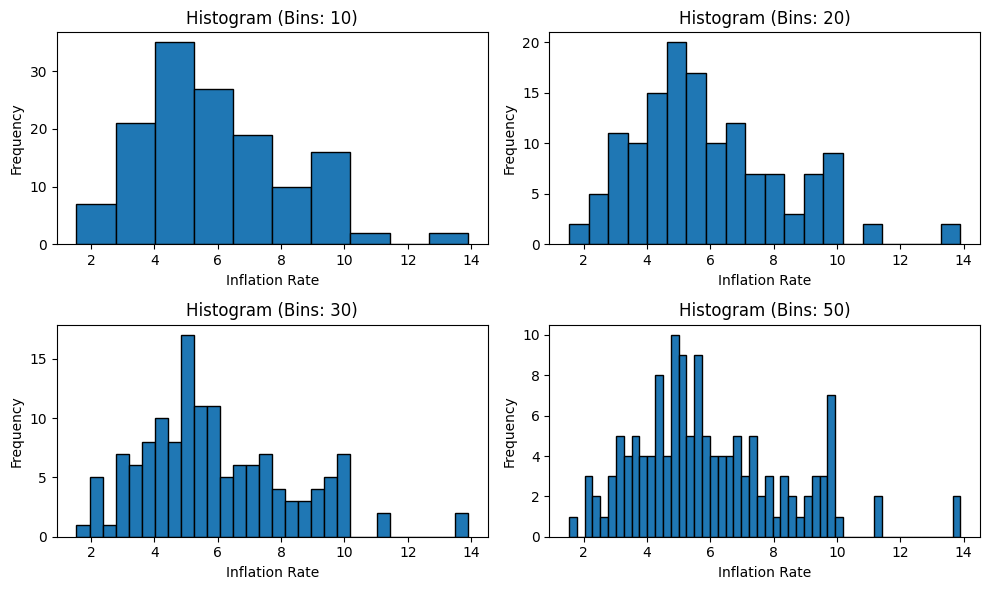

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting histogram with different bin sizes
plt.subplot(2, 2, 1)
plt.hist(data['Inflation rate'], bins=10, edgecolor='black')
plt.title('Histogram (Bins: 10)')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['Inflation rate'], bins=20, edgecolor='black')
plt.title('Histogram (Bins: 20)')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['Inflation rate'], bins=30, edgecolor='black')
plt.title('Histogram (Bins: 30)')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data['Inflation rate'], bins=50, edgecolor='black')
plt.title('Histogram (Bins: 50)')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


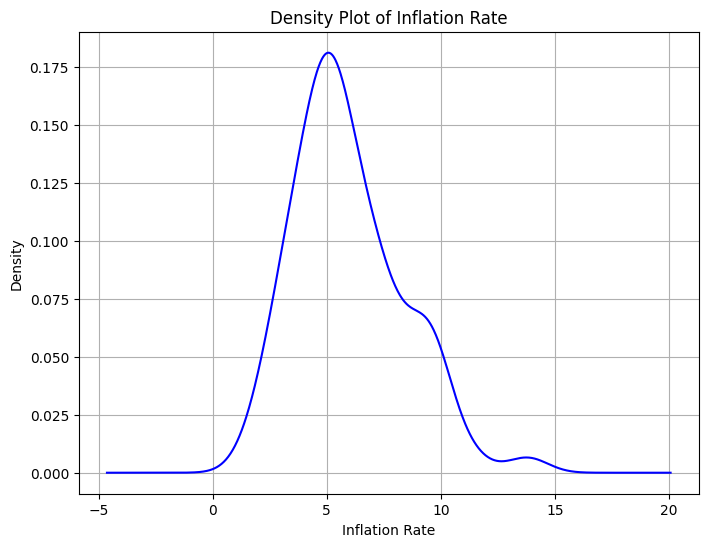

In [ ]:
plt.figure(figsize=(8, 6))

# Plotting density plot
data['Inflation rate'].plot(kind='kde', color='blue')
plt.title('Density Plot of Inflation Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
# Calculate quartiles and IQR
Q1 = data['Inflation rate'].quantile(0.25)
Q3 = data['Inflation rate'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5  # Adjust this value based on your dataset

# Identify outliers using IQR
outliers = data[(data['Inflation rate'] < (Q1 - threshold * IQR)) | (data['Inflation rate'] > (Q3 + threshold * IQR))]

# Print and handle outliers (if needed)
if not outliers.empty:
    print("Outliers Detected:")
    print(outliers)
    # Handle outliers (e.g., remove or replace with median/mean)
    # For example, you can remove outliers:
    # data_cleaned = data[~((data['Inflation rate'] < (Q1 - threshold * IQR)) | (data['Inflation rate'] > (Q3 + threshold * IQR)))]
else:
    print("No outliers detected.")


Outliers Detected:
              Inflation rate  Seasonal Difference  Month
Release Date                                            
2010-08-02              13.7                  3.9      8
2010-06-30              13.9                  4.7      6


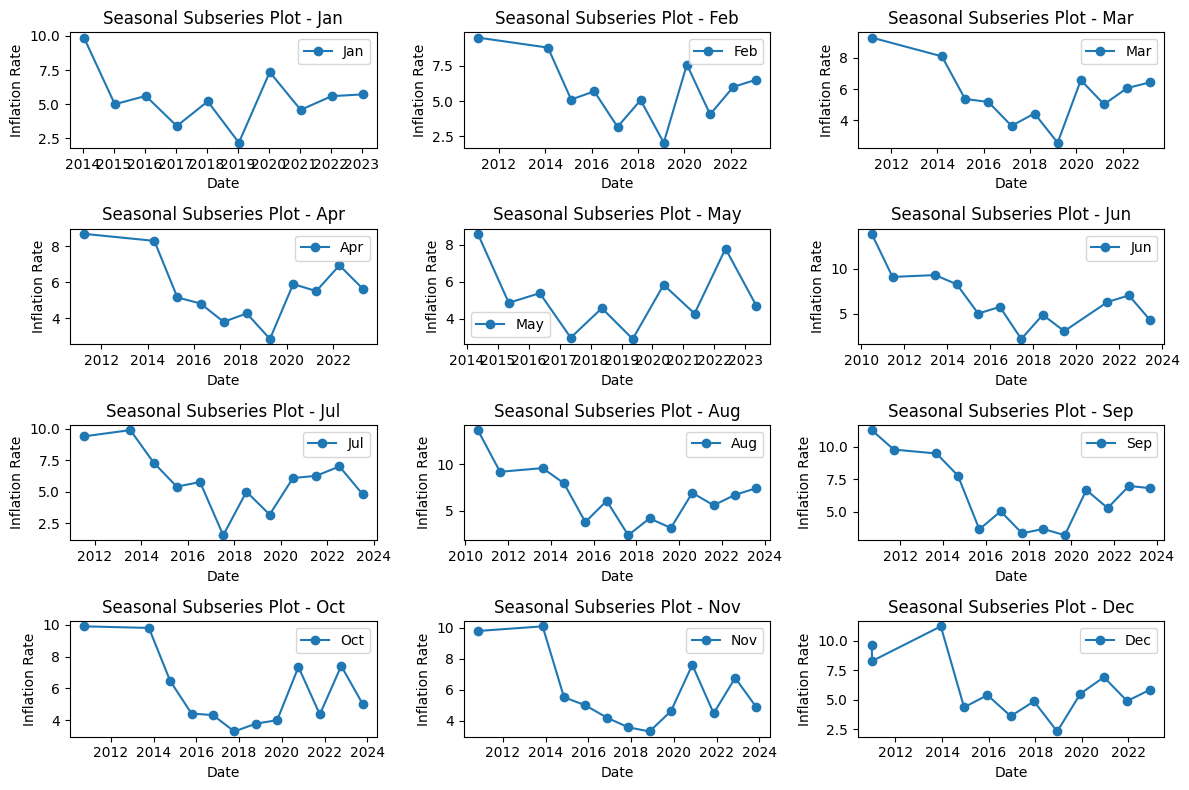

In [ ]:
import calendar

# Assuming monthly data, extract month-wise subsets
monthly_data = data['Inflation rate'].groupby(data.index.month)

# Create seasonal subseries plots
plt.figure(figsize=(12, 8))

for i, (month, subset) in enumerate(monthly_data, start=1):
    month_name = calendar.month_abbr[month]  # Get month abbreviation (e.g., Jan, Feb)
    plt.subplot(4, 3, i)
    plt.plot(subset.index, subset.values, marker='o', linestyle='-', label=f'{month_name}')
    plt.title(f'Seasonal Subseries Plot - {month_name}')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.legend()

plt.tight_layout()
plt.show()



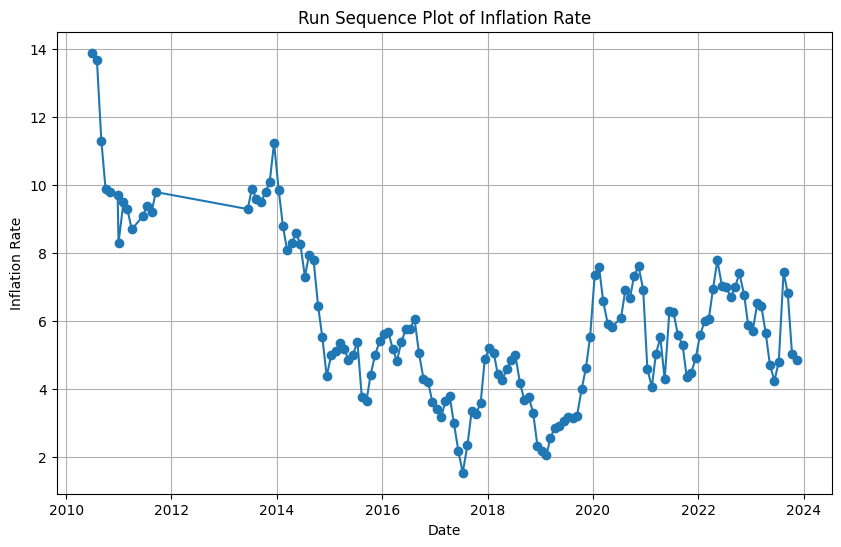

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting run sequence
plt.plot(data.index, data['Inflation rate'], marker='o', linestyle='-')
plt.title('Run Sequence Plot of Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()


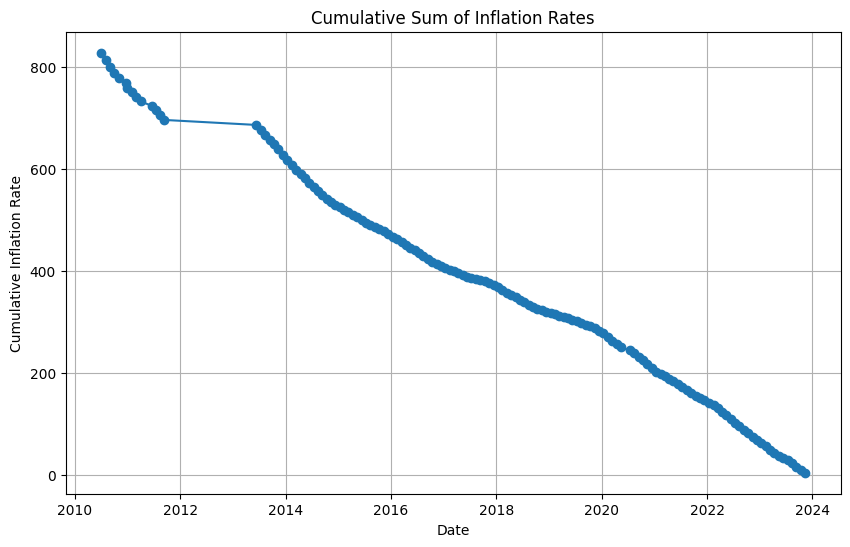

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate cumulative sum of inflation rates
cumulative_sum = data['Inflation rate'].cumsum()

# Plotting cumulative sum
plt.plot(data.index, cumulative_sum, marker='o', linestyle='-')
plt.title('Cumulative Sum of Inflation Rates')
plt.xlabel('Date')
plt.ylabel('Cumulative Inflation Rate')
plt.grid(True)
plt.show()


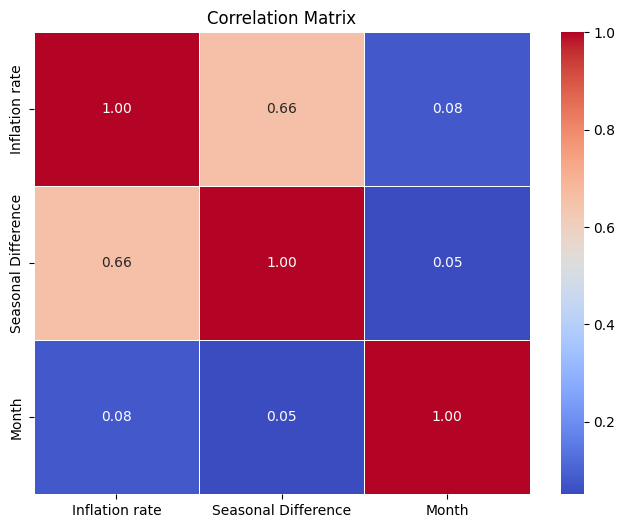

In [ ]:
import seaborn as  sns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Compute autocorrelation for 'Inflation rate'
autocorr = data['Inflation rate'].autocorr()

print(f'Autocorrelation for Inflation rate: {autocorr}')


Autocorrelation for Inflation rate: 0.9474917858419146


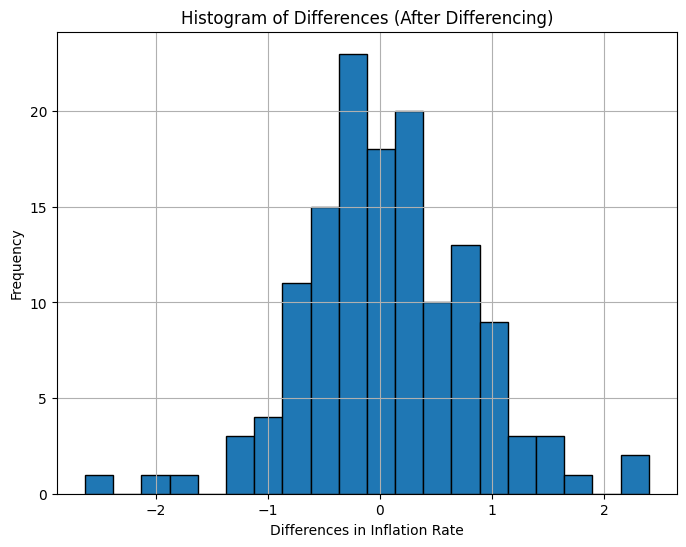

In [ ]:
# Calculate differences
differences = data['Inflation rate'].diff().dropna()

# Plotting histogram of differences
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=20, edgecolor='black')
plt.title('Histogram of Differences (After Differencing)')
plt.xlabel('Differences in Inflation Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


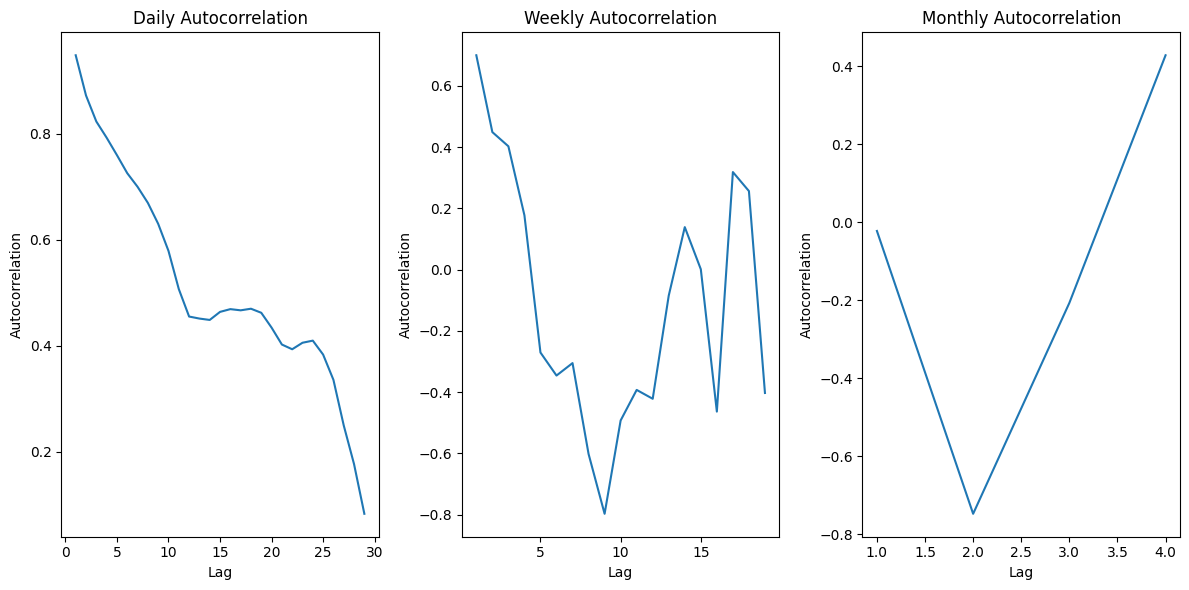

In [ ]:
# Calculate autocorrelation for different frequencies
lags_daily = 30  # Example for daily data
lags_weekly = 52  # Example for weekly data
lags_monthly = 12  # Example for monthly data

# Daily autocorrelation
autocorr_daily = [data['Inflation rate'].autocorr(lag=i) for i in range(1, lags_daily)]

# Weekly autocorrelation (assuming data is daily)
autocorr_weekly = [data['Inflation rate'].autocorr(lag=i*7) for i in range(1, lags_weekly)]

# Monthly autocorrelation (assuming data is daily)
autocorr_monthly = [data['Inflation rate'].autocorr(lag=i*30) for i in range(1, lags_monthly)]

# Plotting autocorrelation at different frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1, lags_daily), autocorr_daily)
plt.title('Daily Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.subplot(1, 3, 2)
plt.plot(range(1, lags_weekly), autocorr_weekly)
plt.title('Weekly Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.subplot(1, 3, 3)
plt.plot(range(1, lags_monthly), autocorr_monthly)
plt.title('Monthly Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is in 'data['Inflation rate']'
adf_result = adfuller(data['Inflation rate'])

# Extracting and printing ADF test results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')


ADF Statistic: 1.7629213844742122
p-value: 0.9982725715921548
Critical Values:
   1%: -3.484219653271961
   5%: -2.885145235641637
   10%: -2.579359138917794


In [ ]:
# Assuming 'data' is your DataFrame and 'Inflation rate' is the column name
# Drop missing values before differencing
data_clean = data.dropna(subset=['Inflation rate'])

# Differencing the data
data_clean['Inflation rate_diff'] = data_clean['Inflation rate'].diff()

# Check if differencing made the data stationary
adf_result_diff = adfuller(data_clean['Inflation rate_diff'].dropna())

# Print the ADF test results for differenced data
print(f'ADF Statistic after differencing: {adf_result_diff[0]}')
print(f'p-value after differencing: {adf_result_diff[1]}')
print('Critical Values after differencing:')
for key, value in adf_result_diff[4].items():
    print(f'   {key}: {value}')


ADF Statistic after differencing: -3.849959328038664
p-value after differencing: 0.00243559192646398
Critical Values after differencing:
   1%: -3.4846672514209773
   5%: -2.8853397507076006
   10%: -2.5794629869786503


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data_clean' contains your differenced data and 'Inflation rate_diff' is the differenced column
# Define the ARIMA model with appropriate (p, d, q) parameters
p, d, q = 1, 1, 1  # Replace with your chosen values
model = ARIMA(data_clean['Inflation rate_diff'], order=(p, d, q))

# Fit the ARIMA model
fitted_model = model.fit()
print(fitted_model.summary())


# Forecast using the fitted model
forecast_steps = 10  # Number of steps ahead to forecast
forecast = fitted_model.forecast(steps=forecast_steps)
print(forecast)  # Display the forecasted values


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                                SARIMAX Results                                
Dep. Variable:     Inflation rate_diff   No. Observations:                  139
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -164.708
Date:                 Sat, 09 Dec 2023   AIC                            335.417
Time:                         13:55:53   BIC                            344.198
Sample:                              0   HQIC                           338.985
                                 - 139                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1889      0.096      1.961      0.050    7.31e-05       0.378
ma.L1         -0.9987      0.379     -2.636      0.008      -1.741      -0.256
sigma2         0.5601      0.205      2.731 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


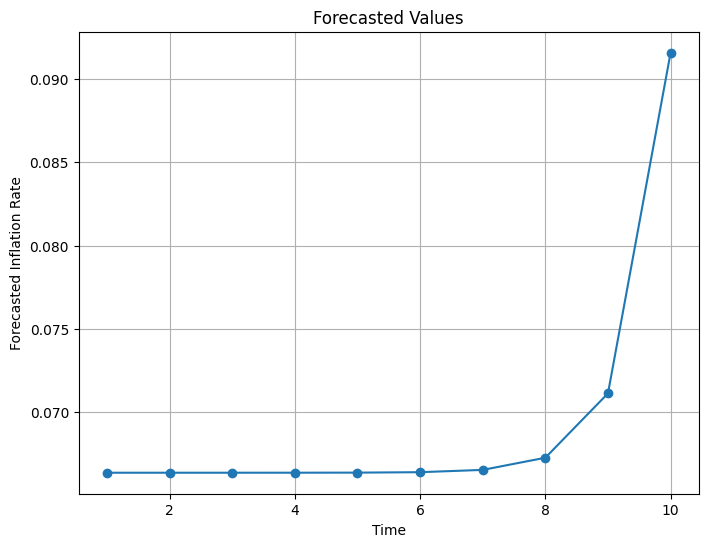

In [ ]:
# Forecasted values displayed in the notebook
forecasted_values = [0.091591, 0.071110, 0.067240, 0.066509, 0.066371,
                     0.066345, 0.066340, 0.066339, 0.066339, 0.066339]

# Reversing the array
reversed_forecast = forecasted_values[::-1]

# Plotting the reversed forecasted values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(reversed_forecast) + 1), reversed_forecast, marker='o', linestyle='-')
plt.title('Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Forecasted Inflation Rate')
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path in your Google Drive
file_path = '/content/drive/My Drive/prices.xlsx'

# Load data into a DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Check for data types and other anomalies
print(data.info())


Mounted at /content/drive
                     Commodities  2023-12-09 00:00:00  2023-12-08 00:00:00  \
0                           Rice                43.09                43.31   
1                          Wheat                31.06                30.96   
2                   Atta (Wheat)                36.35                36.20   
3  Gram Dal(Bharat Dal Adjusted)                79.72                80.18   
4                       Gram Dal                83.20                83.74   

   2023-12-07 00:00:00  2023-12-06 00:00:00  2023-12-05 00:00:00  \
0                43.31                43.25                43.13   
1                30.84                30.99                31.02   
2                36.11                36.19                36.32   
3                79.97                80.13                80.24   
4                83.49                83.68                83.81   

   2023-12-04 00:00:00  2023-12-02 00:00:00  2023-11-09 00:00:00  \
0                43.16      

In [ ]:
# Assuming your DataFrame is named 'df'
numeric_data = data.iloc[:, 1:]  # Selecting only numeric columns

# Displaying basic descriptive statistics
statistics = numeric_data.describe()
print(statistics)



       2023-12-09 00:00:00  2023-12-08 00:00:00  2023-12-07 00:00:00  \
count            23.000000            23.000000            23.000000   
mean             93.108696            93.793478            93.674348   
std              61.490651            61.958632            61.888808   
min              22.560000            22.510000            22.350000   
25%              43.955000            44.050000            44.050000   
50%              83.200000            83.740000            83.490000   
75%             123.185000           124.875000           124.745000   
max             278.730000           281.340000           281.380000   

       2023-12-06 00:00:00  2023-12-05 00:00:00  2023-12-04 00:00:00  \
count            23.000000            23.000000            23.000000   
mean             93.799565            93.726957            93.593043   
std              61.920680            61.735750            61.435431   
min              22.260000            22.350000            22.2

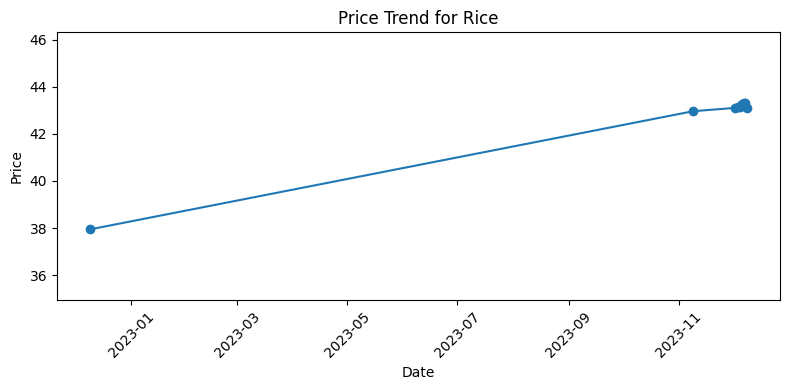

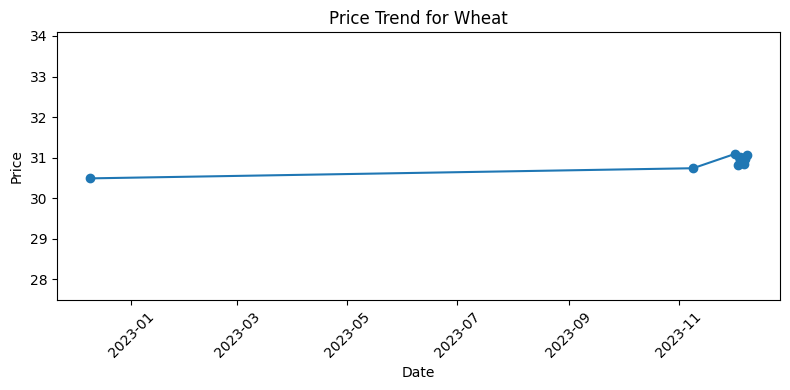

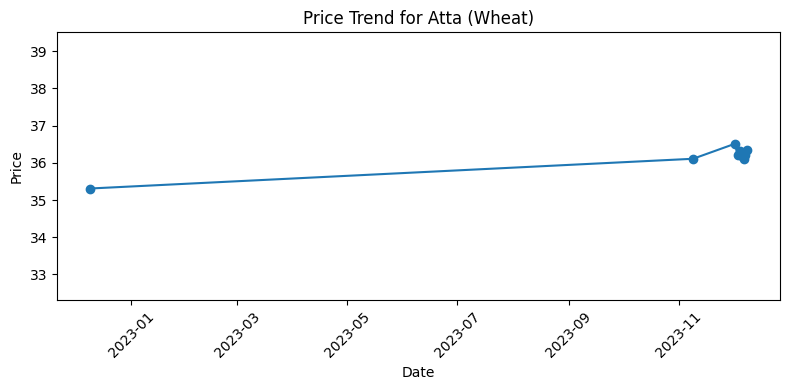

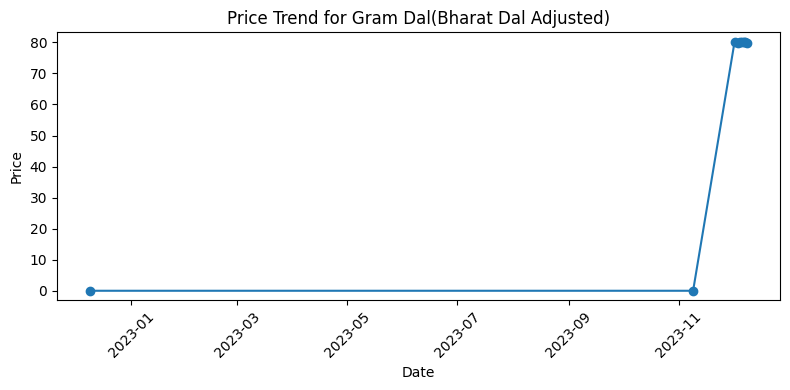

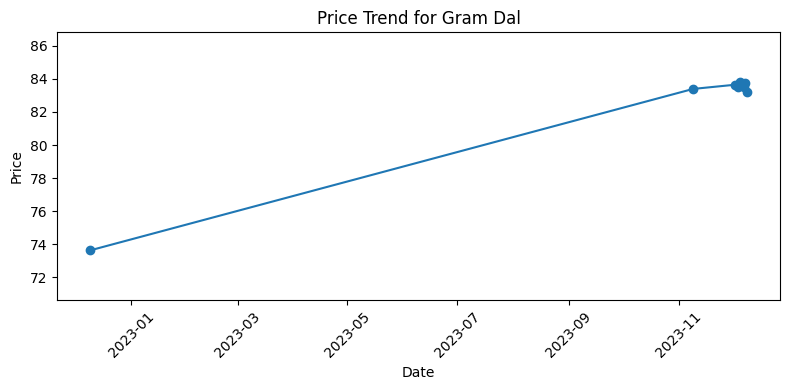

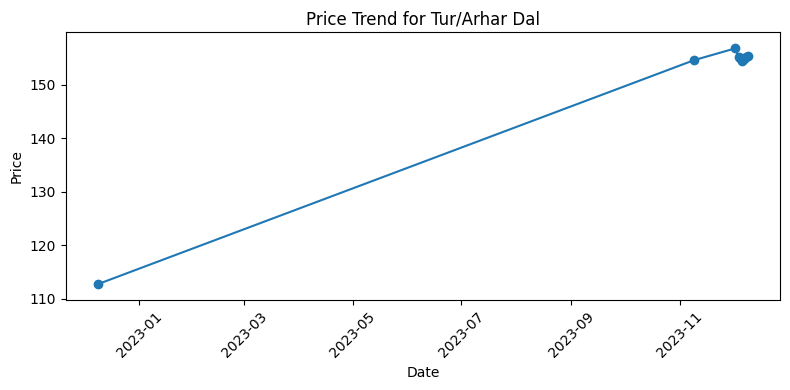

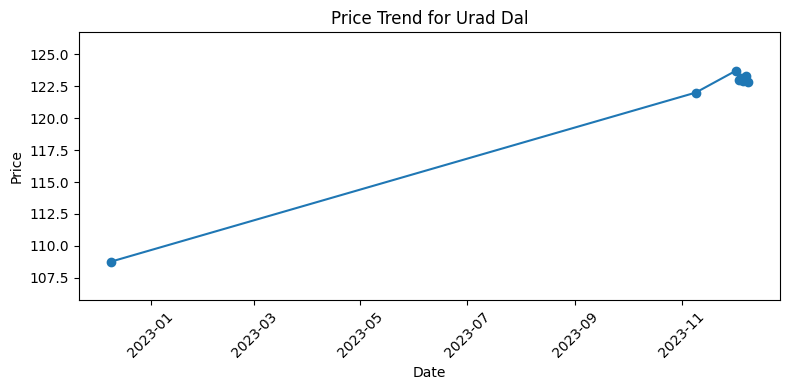

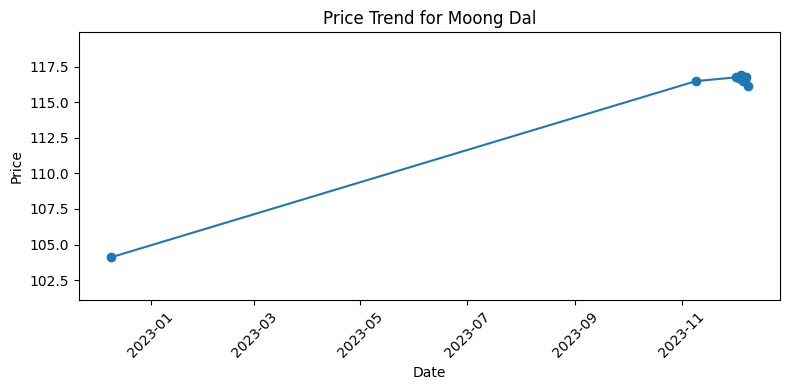

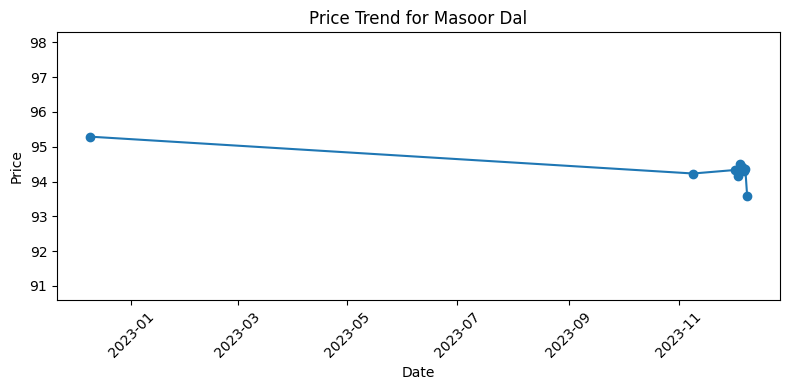

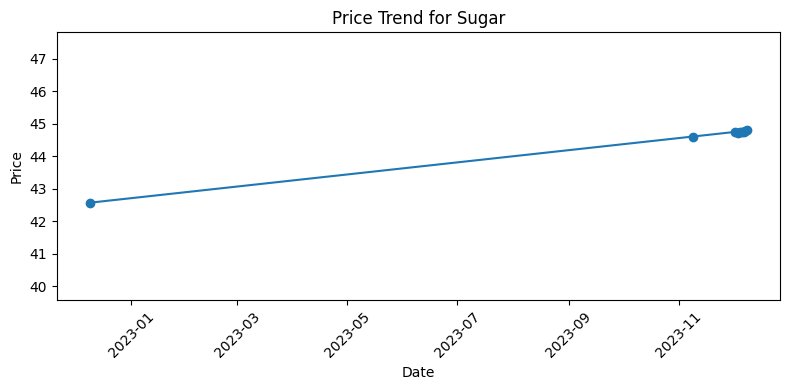

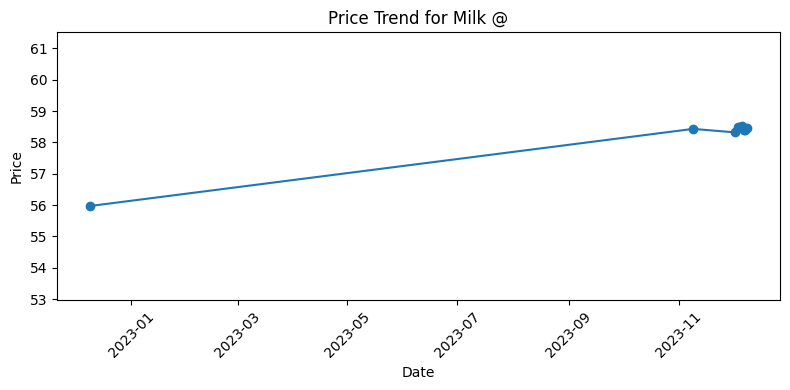

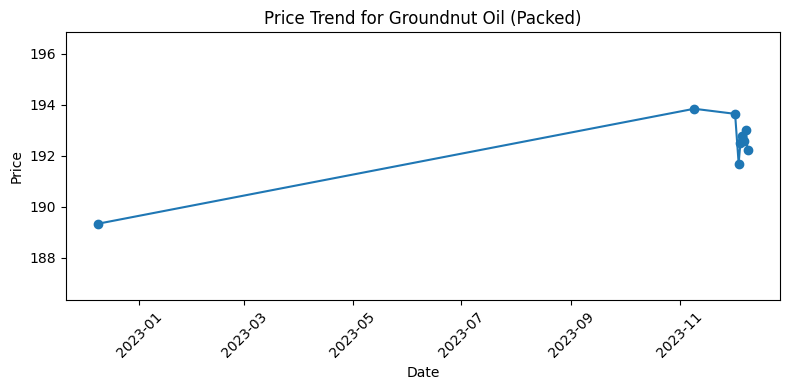

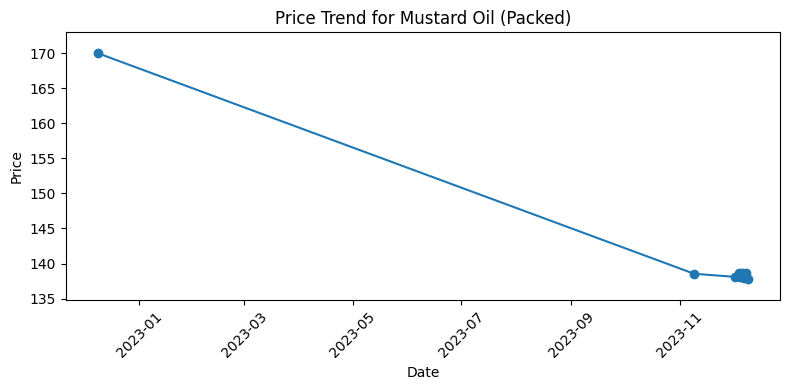

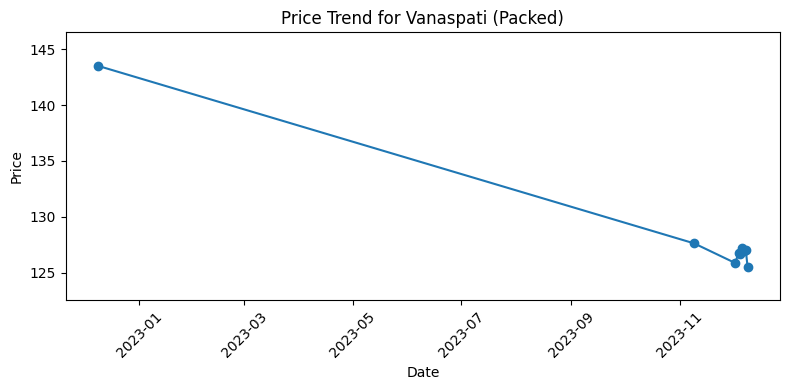

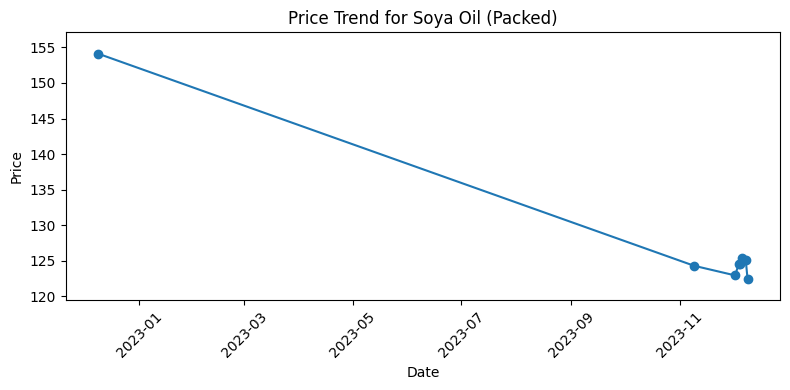

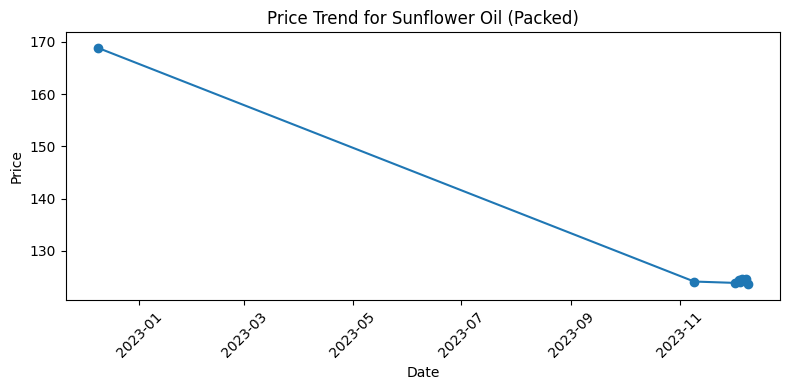

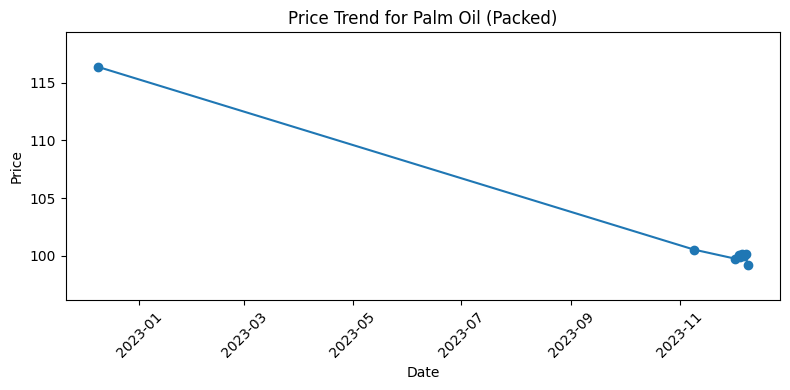

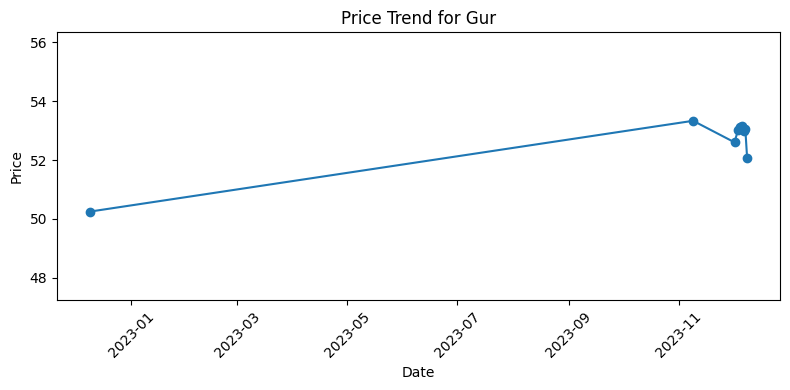

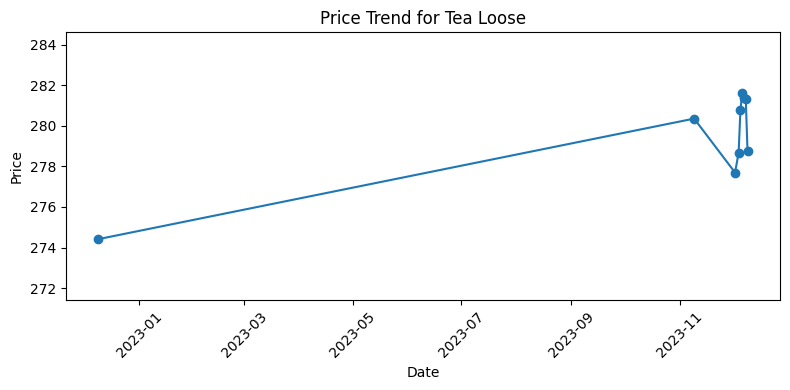

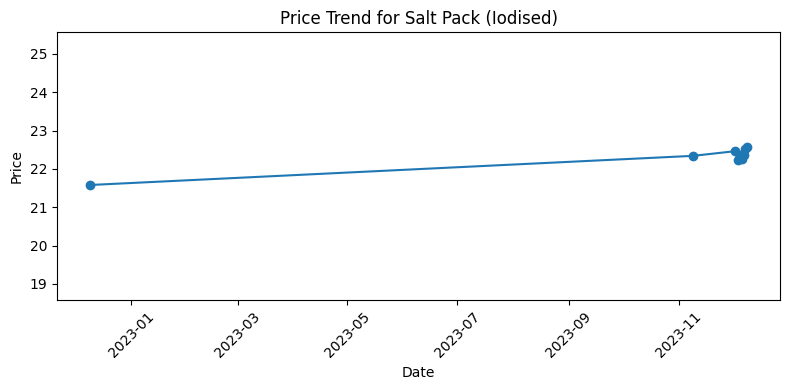

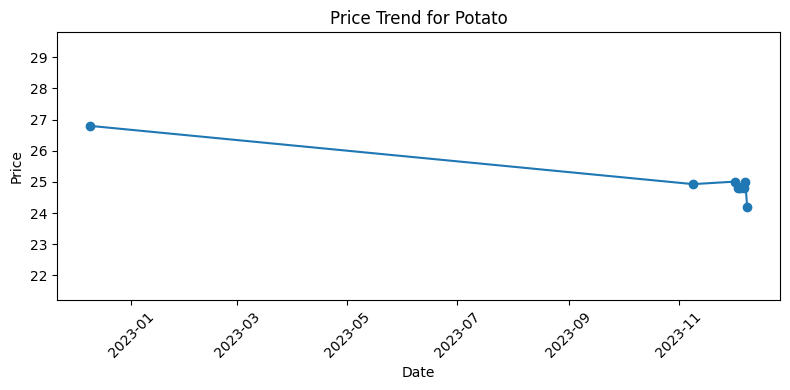

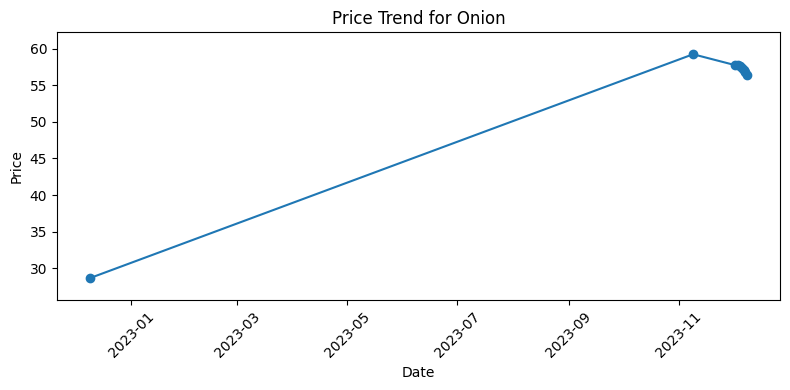

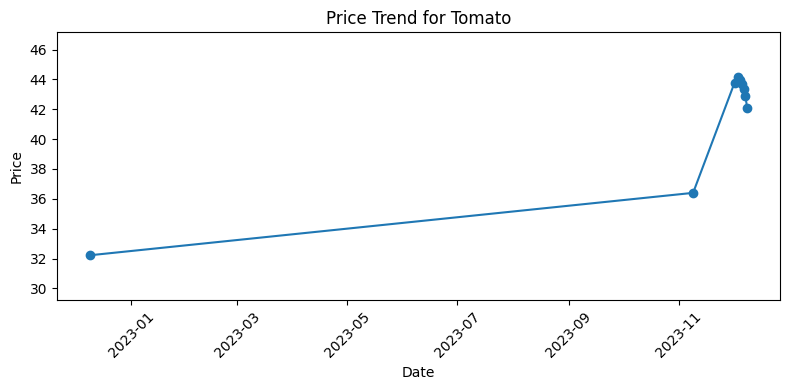

In [ ]:
import matplotlib.pyplot as plt

# Dropping rows with NaN values in 'Commodities' column
data_cleaned = data.dropna(subset=['Commodities'])

# Loop through each commodity and plot its price variation
for index, row in data_cleaned.iterrows():
    commodity = row['Commodities']
    prices = row.values[1:]  # Extract prices for the commodity
    dates = data.columns[1:]  # Extract dates

    plt.figure(figsize=(8, 4))
    plt.plot(dates, prices, marker='o')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Trend for {commodity}')
    plt.xticks(rotation=45)
    plt.ylim(min(prices) - 3, max(prices) + 3)  # Adjusting y-axis gap
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Assuming quantities consumed per month for an average Indian family
monthly_consumption = {
    'Rice': 10,              # in kg
    'Wheat': 5,              # in kg
    'Atta (Wheat)': 2,       # in kg
    'Gram Dal(Bharat Dal Adjusted)': 2,  # in kg
    'Gram Dal': 2,           # in kg
    'Tur/Arhar Dal': 2,      # in kg
    'Urad Dal': 1,           # in kg
    'Moong Dal': 1,          # in kg
    'Masoor Dal': 1,         # in kg
    'Sugar': 3,              # in kg
    'Milk @': 30,            # in liters
    'Groundnut Oil (Packed)': 1,     # in liters
    'Mustard Oil (Packed)': 1,       # in liters
    'Vanaspati (Packed)': 1,         # in kg
    'Soya Oil (Packed)': 1,          # in liters
    'Sunflower Oil (Packed)': 1,     # in liters
    'Palm Oil (Packed)': 1,          # in liters
    'Gur': 1,                         # in kg
    'Tea Loose': 0.5,                 # in kg
    'Salt Pack (Iodised)': 0.5,       # in kg
    'Potato': 5,                      # in kg
    'Onion': 3,                       # in kg
    'Tomato': 5                       # in kg
}


# Assuming the prices are in the second column (adjust column index if needed)
prices = data.iloc[:, 1]  # Retrieve the prices from the second column

# Calculate total monthly expenditure for each commodity
bill = {}
for commodity, consumption in monthly_consumption.items():
    price = prices.loc[data['Commodities'] == commodity].values[0]
    total_price = price * consumption
    bill[commodity] = round(total_price, 2)

# Display the bill
print("===========================================")
print("Monthly Expenditure - Consumption Summary")
print("===========================================")
total_cost = 0
for commodity, total_price in bill.items():
    print(f"{commodity}: Rs. {total_price:.2f}")
    total_cost += total_price

print("-------------------------------------------")
print(f"Total Monthly Expenditure: Rs. {total_cost:.2f}")
print("===========================================")


Monthly Expenditure - Consumption Summary
Rice: Rs. 430.90
Wheat: Rs. 155.30
Atta (Wheat): Rs. 72.70
Gram Dal(Bharat Dal Adjusted): Rs. 159.44
Gram Dal: Rs. 166.40
Tur/Arhar Dal: Rs. 310.76
Urad Dal: Rs. 122.82
Moong Dal: Rs. 116.12
Masoor Dal: Rs. 93.59
Sugar: Rs. 134.46
Milk @: Rs. 1753.50
Groundnut Oil (Packed): Rs. 192.23
Mustard Oil (Packed): Rs. 137.79
Vanaspati (Packed): Rs. 125.56
Soya Oil (Packed): Rs. 122.48
Sunflower Oil (Packed): Rs. 123.55
Palm Oil (Packed): Rs. 99.17
Gur: Rs. 52.06
Tea Loose: Rs. 139.36
Salt Pack (Iodised): Rs. 11.28
Potato: Rs. 121.05
Onion: Rs. 169.38
Tomato: Rs. 210.50
-------------------------------------------
Total Monthly Expenditure: Rs. 5020.40


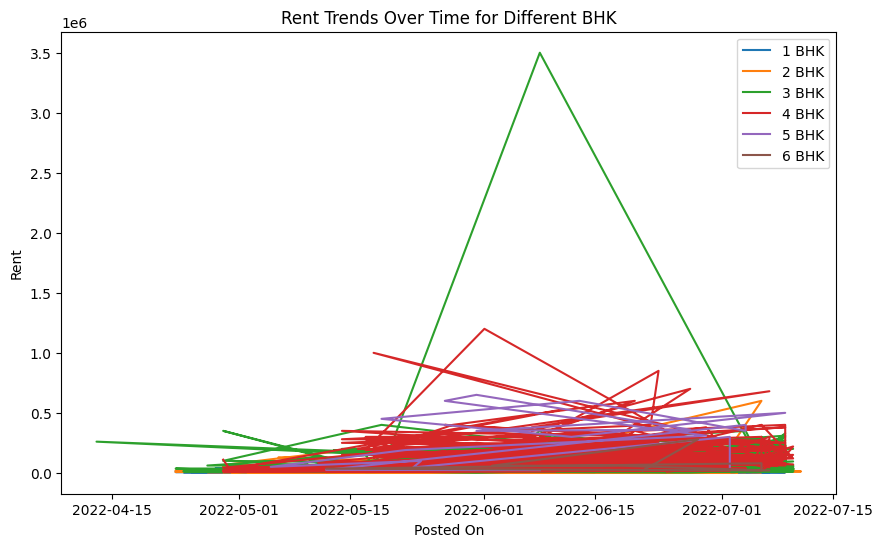

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('House_Rent_Dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Convert 'Posted On' column to datetime
data['Posted On'] = pd.to_datetime(data['Posted On'])

# Calculate average rent per BHK
avg_rent_per_bhk = data.groupby('BHK')['Rent'].mean().reset_index()

# Plotting rent trends over time
plt.figure(figsize=(10, 6))
for bhk in avg_rent_per_bhk['BHK']:
    subset = data[data['BHK'] == bhk]
    plt.plot(subset['Posted On'], subset['Rent'], label=f'{bhk} BHK')

plt.title('Rent Trends Over Time for Different BHK')
plt.xlabel('Posted On')
plt.ylabel('Rent')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('House_Rent_Dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Calculate average rent per BHK
avg_rent_per_bhk = data.groupby('BHK')['Rent'].mean().reset_index()
print(avg_rent_per_bhk)


   BHK           Rent
0    1   14139.223650
1    2   22113.864018
2    3   55863.062842
3    4  168864.555556
4    5  297500.000000
5    6   73125.000000


In [ ]:
# Average rent prices for different BHK in different city tiers
average_prices = {
    'Metropolitan': {'1 BHK': 14139.22, '2 BHK': 22113.86},
    'Tier-II': {'1 BHK': 14139.22 / 2, '2 BHK': 22113.86 / 2},
    'Tier-III': {'1 BHK': 14139.22 / 3, '2 BHK': 22113.86 / 3}
}

# Monthly expenditure for different family sizes (excluding utility bills)
monthly_expenditure = 5020.40

# Utility bills (water, electricity, TV, and internet)
utility_bills = {
    'Metropolitan': {'1 BHK': 1500, '2 BHK': 2500},
    'Tier-II': {'1 BHK': 1500 / 2, '2 BHK': 2500 / 2},
    'Tier-III': {'1 BHK': 1500 / 3, '2 BHK': 2500 / 3}
}

# Calculating total monthly expenses (including rent, monthly expenditure, and utility bills)
total_expenses = {}
for city, prices in average_prices.items():
    expenses = {
        'Small Family (3 members)': {},
        'Medium Family (4-5 members)': {}
    }
    for size, price in prices.items():
        rent = price
        utilities = utility_bills[city][size]
        expenses['Small Family (3 members)'][size] = rent + monthly_expenditure + utilities
        expenses['Medium Family (4-5 members)'][size] = rent * 2 + monthly_expenditure + utilities
    total_expenses[city] = expenses

# Displaying the calculated expenses for different city tiers and family sizes
print("How much does a family need to survive?\n")
for city, expenses in total_expenses.items():
    print(f"{city} Cities:")
    for family_size, size_expenses in expenses.items():
        print(f"   {family_size}:")
        for size, expense in size_expenses.items():
            print(f"      {size}: Rs. {expense:.2f}")
    print("\n")


How much does a family need to survive?

Metropolitan Cities:
   Small Family (3 members):
      1 BHK: Rs. 20659.62
      2 BHK: Rs. 29634.26
   Medium Family (4-5 members):
      1 BHK: Rs. 34798.84
      2 BHK: Rs. 51748.12


Tier-II Cities:
   Small Family (3 members):
      1 BHK: Rs. 12840.01
      2 BHK: Rs. 17327.33
   Medium Family (4-5 members):
      1 BHK: Rs. 19909.62
      2 BHK: Rs. 28384.26


Tier-III Cities:
   Small Family (3 members):
      1 BHK: Rs. 10233.47
      2 BHK: Rs. 13225.02
   Medium Family (4-5 members):
      1 BHK: Rs. 14946.55
      2 BHK: Rs. 20596.31




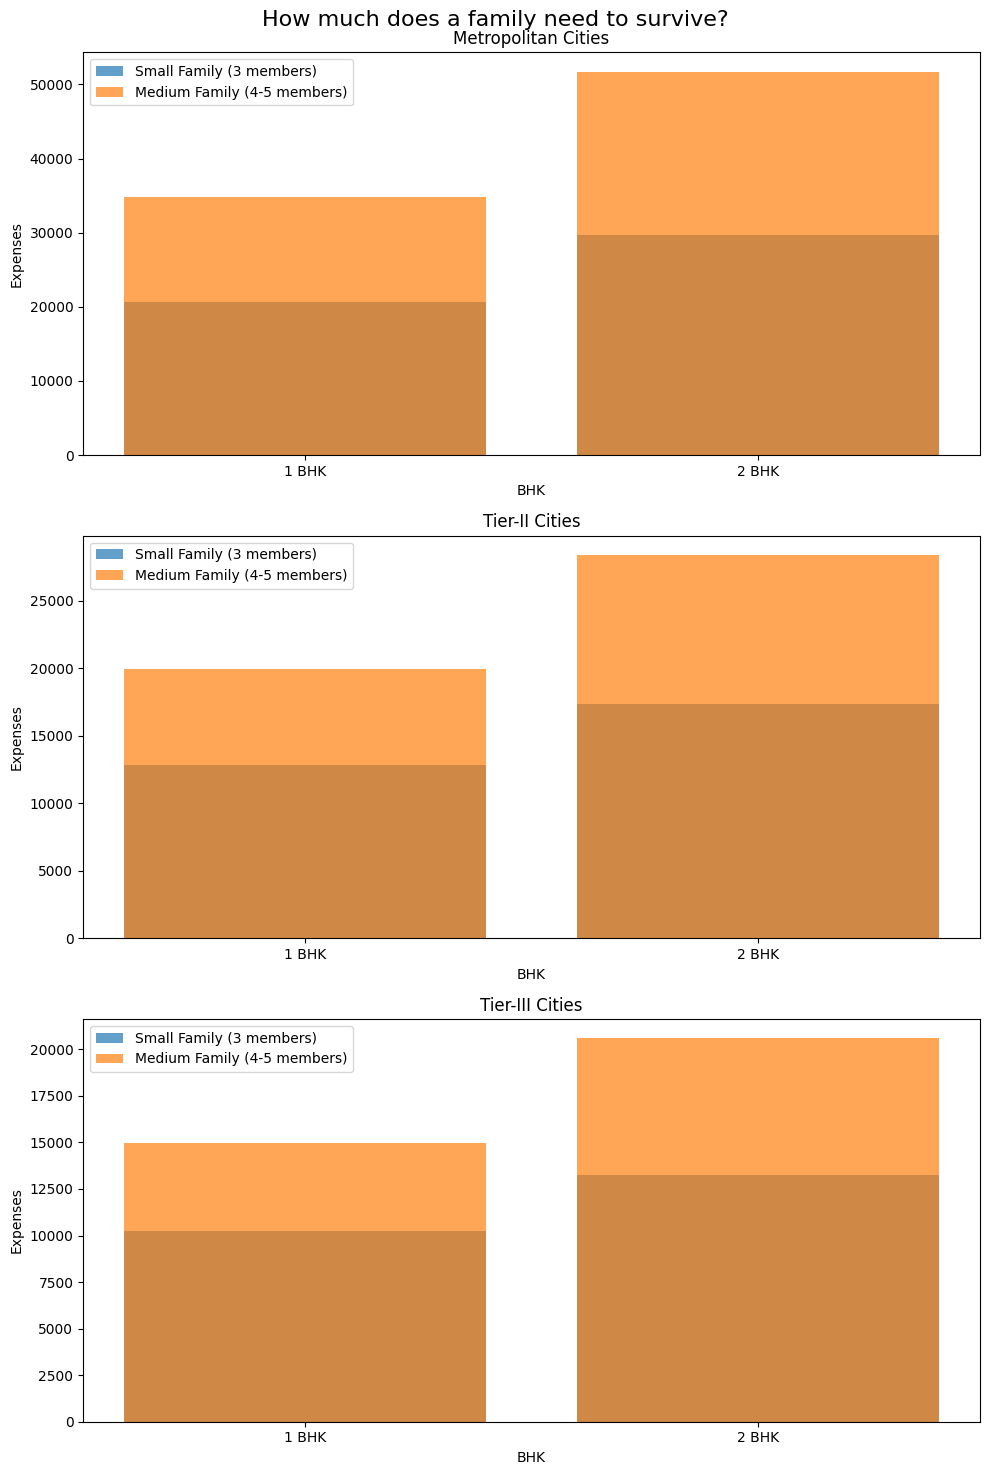

In [ ]:
import matplotlib.pyplot as plt

# Corrected expenses
expenses_data = {
    'Metropolitan Cities': {
        'Small Family (3 members)': {'1 BHK': 20659.62, '2 BHK': 29634.26},
        'Medium Family (4-5 members)': {'1 BHK': 34798.84, '2 BHK': 51748.12}
    },
    'Tier-II Cities': {
        'Small Family (3 members)': {'1 BHK': 12840.01, '2 BHK': 17327.33},
        'Medium Family (4-5 members)': {'1 BHK': 19909.62, '2 BHK': 28384.26}
    },
    'Tier-III Cities': {
        'Small Family (3 members)': {'1 BHK': 10233.47, '2 BHK': 13225.02},
        'Medium Family (4-5 members)': {'1 BHK': 14946.55, '2 BHK': 20596.31}
    }
}

# Plotting the data
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('How much does a family need to survive?', fontsize=16)

for idx, (city, expenses) in enumerate(expenses_data.items()):
    ax = axes[idx]

    small_family_expenses = list(expenses['Small Family (3 members)'].values())
    medium_family_expenses = list(expenses['Medium Family (4-5 members)'].values())
    bhk_types = list(expenses['Small Family (3 members)'].keys())

    ax.bar(bhk_types, small_family_expenses, alpha=0.7, label='Small Family (3 members)')
    ax.bar(bhk_types, medium_family_expenses, alpha=0.7, label='Medium Family (4-5 members)')

    ax.set_title(city)
    ax.set_xlabel('BHK')
    ax.set_ylabel('Expenses')
    ax.legend()

plt.tight_layout()
plt.show()


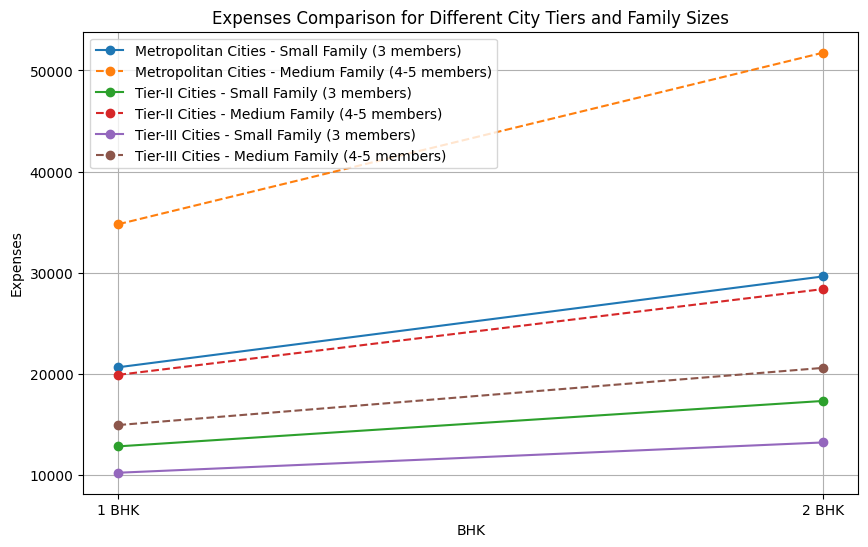

In [ ]:
import matplotlib.pyplot as plt

# Corrected expenses
expenses_data = {
    'Metropolitan Cities': {
        'Small Family (3 members)': {'1 BHK': 20659.62, '2 BHK': 29634.26},
        'Medium Family (4-5 members)': {'1 BHK': 34798.84, '2 BHK': 51748.12}
    },
    'Tier-II Cities': {
        'Small Family (3 members)': {'1 BHK': 12840.01, '2 BHK': 17327.33},
        'Medium Family (4-5 members)': {'1 BHK': 19909.62, '2 BHK': 28384.26}
    },
    'Tier-III Cities': {
        'Small Family (3 members)': {'1 BHK': 10233.47, '2 BHK': 13225.02},
        'Medium Family (4-5 members)': {'1 BHK': 14946.55, '2 BHK': 20596.31}
    }
}

# Extracting expenses data for plotting
categories = list(expenses_data.keys())
bhk_types = list(expenses_data['Metropolitan Cities']['Small Family (3 members)'].keys())

small_family_expenses = {category: list(expenses['Small Family (3 members)'].values()) for category, expenses in expenses_data.items()}
medium_family_expenses = {category: list(expenses['Medium Family (4-5 members)'].values()) for category, expenses in expenses_data.items()}

# Plotting the data
plt.figure(figsize=(10, 6))
for category in categories:
    plt.plot(bhk_types, small_family_expenses[category], marker='o', label=f'{category} - Small Family (3 members)')
    plt.plot(bhk_types, medium_family_expenses[category], marker='o', linestyle='--', label=f'{category} - Medium Family (4-5 members)')

plt.title('Expenses Comparison for Different City Tiers and Family Sizes')
plt.xlabel('BHK')
plt.ylabel('Expenses')
plt.legend()
plt.grid(True)
plt.show()
